In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Chemical_Dataf.csv")

In [ ]:
data.head()

,Chemical Name,Rate/kg,Rarity,Date Purchased,Company,Amount Purchased
0,Sera Zyme SX,125,6,01-10-2021,company15,350
1,Glauber Salt,10,11,01-10-2021,company10,275
2,Caustic Flakes,50,4,02-10-2021,company11,515
3,Monosodium glutamate,280,4,03-10-2021,company37,495
4,Sera Zon C,110,5,03-10-2021,company8,680


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Chemical Name     1000 non-null   object
 1   Rate/kg           1000 non-null   int64 
 2   Rarity            1000 non-null   int64 
 3   Date Purchased    1000 non-null   object
 4   Company           1000 non-null   object
 5   Amount Purchased  1000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 47.0+ KB
None


In [ ]:
print(data.isnull().sum())

Chemical Name       0
Rate/kg             0
Rarity              0
Date Purchased      0
Company             0
Amount Purchased    0
dtype: int64


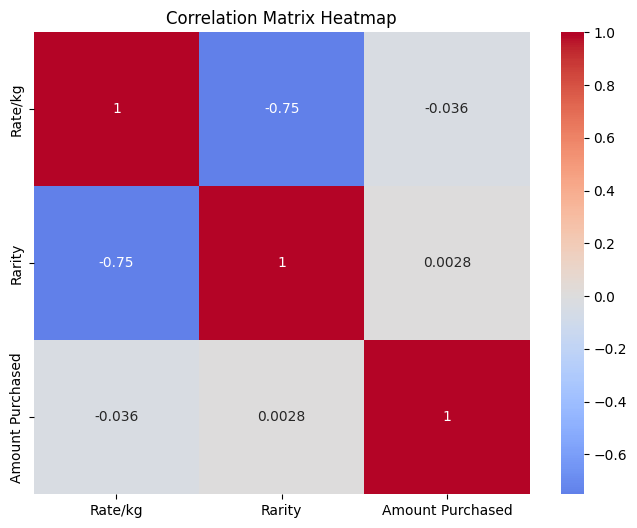

In [ ]:
numerical_features = ['Rate/kg', 'Rarity', 'Amount Purchased']
df_numerical = data[numerical_features]
corr_matrix = df_numerical.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()



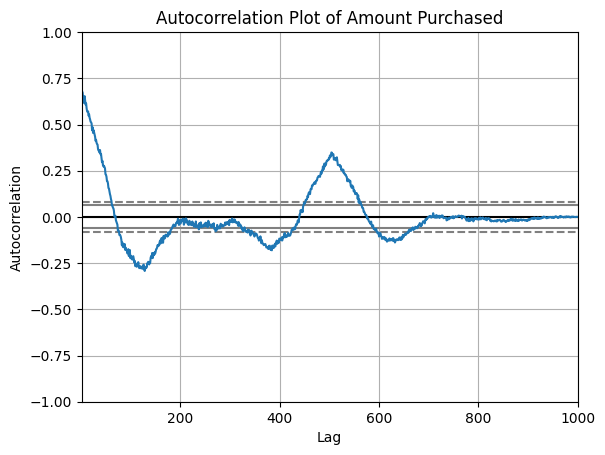

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Amount Purchased'])
plt.title('Autocorrelation Plot of Amount Purchased')
plt.show()


In [ ]:
Dplt.figure(figsize=(13,6.5))
sns.countplot(x='Company', data=data)
plt.title('Distribution of Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

NameError: name 'Dplt' is not defined

In [ ]:
unique_chemicals_and_rates = data[['Chemical Name', 'Rate/kg']].drop_duplicates()
print(unique_chemicals_and_rates)

           Chemical Name  Rate/kg
0           Sera Zyme SX      125
1           Glauber Salt       10
2         Caustic Flakes       50
3   Monosodium glutamate      280
4             Sera Zon C      110
9            Sera Wash C      300
13     Hydrogen Peroxide       37
16              Soda Ash       30
17           Sera Lube H      125
26           Acetic Acid       30


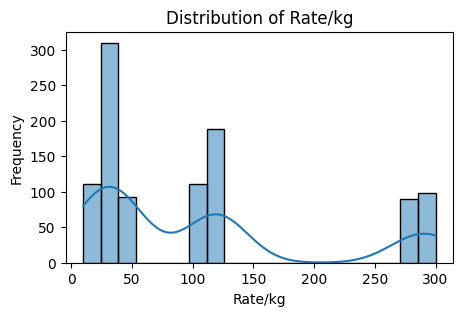

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(data['Rate/kg'], bins=20, kde=True)
plt.title('Distribution of Rate/kg')
plt.xlabel('Rate/kg')
plt.ylabel('Frequency')
plt.show()

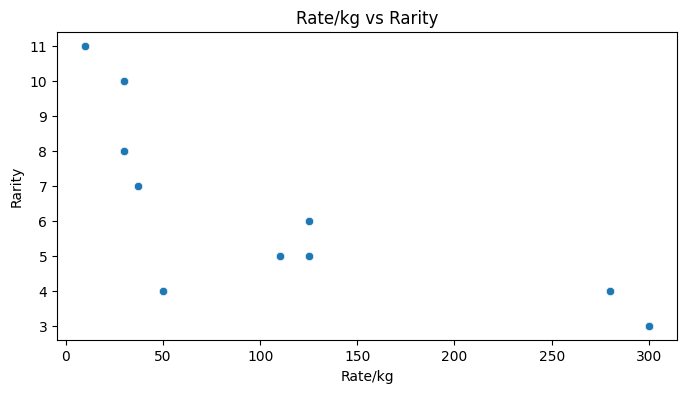

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Rate/kg', y='Rarity', data=data)
plt.title('Rate/kg vs Rarity')
plt.xlabel('Rate/kg')
plt.ylabel('Rarity')
plt.show()

<ipython-input-12-1e7e407ff062>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Amount Purchased', data=data, ci=None)


Text(0, 0.5, 'Amount Purchased')

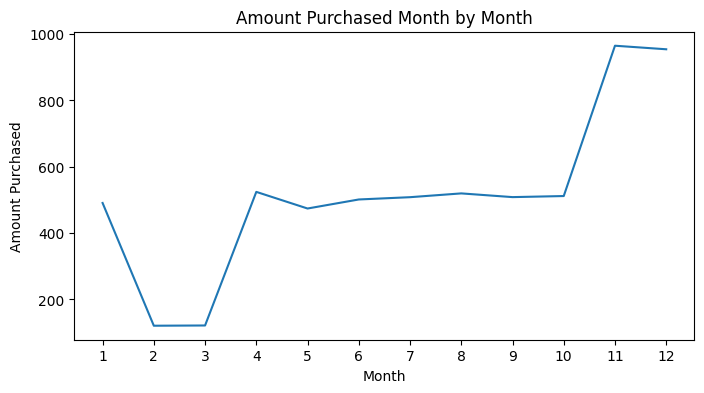

In [ ]:
data['Date Purchased'] = pd.to_datetime(data['Date Purchased'], format='%d-%m-%Y')
data['Month'] = data['Date Purchased'].dt.month
plt.figure(figsize=(8, 4))
sns.lineplot(x='Month', y='Amount Purchased', data=data, ci=None)
plt.title('Amount Purchased Month by Month')
plt.xlabel('Month')
plt.xticks(range(1, 13))
plt.ylabel('Amount Purchased')

  Cost Category  Amount Purchased
0      Low Cost            275210
1     High Cost            253665


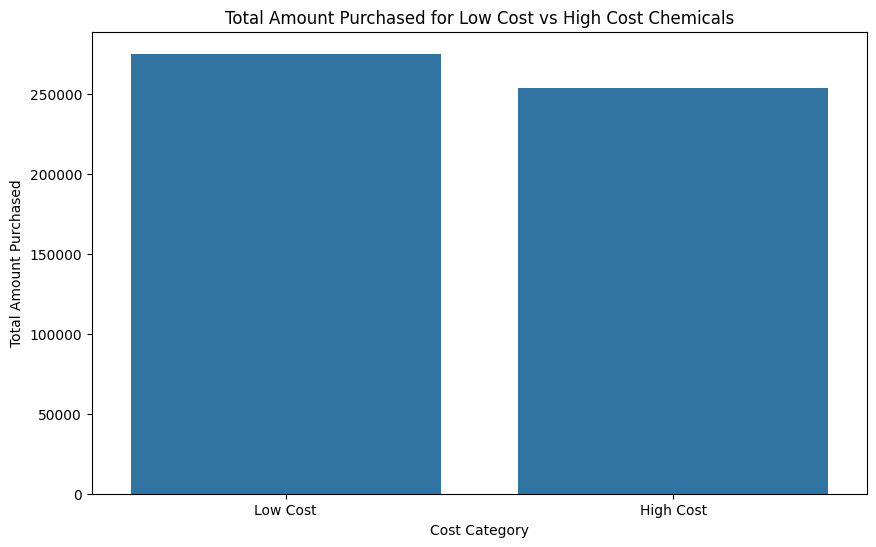

In [ ]:
data['Cost Category'] = pd.cut(data['Rate/kg'], bins=[0, 100, float('inf')], labels=['Low Cost', 'High Cost'])

# Group by the new cost category and calculate the total amount purchased
summary_data = data.groupby('Cost Category')['Amount Purchased'].sum().reset_index()

# Display the summary DataFrame
print(summary_data)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Cost Category', y='Amount Purchased', data=summary_data)
plt.title('Total Amount Purchased for Low Cost vs High Cost Chemicals')
plt.xlabel('Cost Category')
plt.ylabel('Total Amount Purchased')
plt.show()

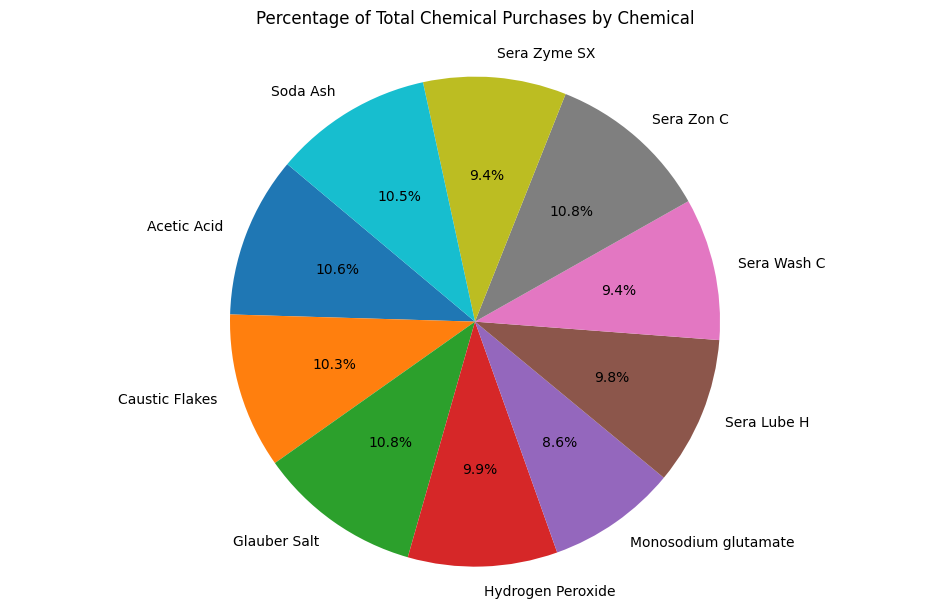

In [ ]:
company_purchases = data.groupby('Chemical Name')['Amount Purchased'].sum()

# Plotting the pie chart
plt.figure(figsize=(12, 7))
plt.pie(company_purchases, labels=company_purchases.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Chemical Purchases by Chemical\n')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()